# Problem Set 4: Choose Your Own Adventure
## By Peter Carlson


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import os

### Describe the dataset you chose.
#### The dataset I chose is from https://www.kaggle.com/vivovinco/nba-player-stats/version/2. It is the regular season individual player stats per game. Each row represents a different player from this year and the teams they have played for.

### Why did you choose it? 
#### I chose it because basketball is something I enjoy a lot! I played in college and might be interested in working for an NBA team some day.

### What features does it include? 
#### Features incuded are rank, player's name, position, player's age, team, games played, games started, minutes played per game, field goals per game, field goal attempts per game, field goal percentage, 3-point field goals per game,3-point field goal attempts per game, 3-point field goal percentage, 2-point field goals per game, 2-point field goal attempts per game,2-point field goal percentage, Effective field goal percentage, Free throws per game, Free throw attempts per game, Free throw percentage, Offensive Rebounds per game, Defensive rebounds per game, Total rebounds per game, Assists per game, Steals per game, Turnovers per game, Personal fouls per game, and Points per game

### What year is it from? 
#### This is from the 2021-2022 season and has been updated as of 14 days ago.

### How was it collected? 
#### The data was collected by Basketball Reference, they collect statistics for the NBA in games.

### What should we know about this dataset as we read your writeup?
#### There are duplicate playernames resulted from team changes


### Define a research question. What are you trying to predict? Describe what you're trying to accomplish (it will differ between Supervised and Unsupervised learning). 
#How do in game statistics impact total games stared in a season. This might help to show who is overproducing. I am trying to see which metrics best show who is likely to start. This will be based on supervised learning as I know what I am looking for with some of the features and am trying to get an output tied to a specific variable.

In [89]:
#load data
os.chdir(r'C:\Users\Peter\Downloads')
PlayerStats_df= pd.read_csv('2021-2022NBAPlayerStats.csv', encoding="Windows-1252", delimiter=";")
print (PlayerStats_df)

#https://www.example-code.com/chilkat2-python/convert_text_file_from_utf8_to_windows_1252.asp to help with loading

      Rk                    Player Pos  Age   Tm   G  GS    MP    FG   FGA  \
0      1          Precious Achiuwa   C   22  TOR  48  23  23.1   3.1   7.3   
1      2              Steven Adams   C   28  MEM  56  55  26.1   2.8   5.0   
2      3               Bam Adebayo   C   24  MIA  33  33  33.0   7.2  13.6   
3      4              Santi Aldama  PF   21  MEM  27   0  10.3   1.4   3.6   
4      5         LaMarcus Aldridge   C   36  BRK  38  11  22.8   5.8  10.5   
5      6  Nickeil Alexander-Walker  SG   23  TOT  52  19  25.4   4.6  12.2   
6      6  Nickeil Alexander-Walker  SG   23  NOP  50  19  26.3   4.7  12.6   
7      6  Nickeil Alexander-Walker  SG   23  UTA   2   0   2.5   0.0   0.5   
8      7             Grayson Allen  SG   26  MIL  49  48  28.0   4.0   9.4   
9      8             Jarrett Allen   C   23  CLE  50  50  32.6   6.6   9.9   
10     9             Jose Alvarado  PG   23  NOP  31   1  12.8   1.9   4.5   
11    10           Justin Anderson  SF   28  TOT   6   0  12.8  

In [90]:
#prepare the data

#drop player duplicates
PlayerStats_df.drop_duplicates(subset = ["Player"],keep='first')




,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,C,22,TOR,48,23,23.1,3.1,7.3,...,0.579,2.2,4.7,6.9,1.1,0.5,0.6,1.0,2.0,7.5
1,2,Steven Adams,C,28,MEM,56,55,26.1,2.8,5.0,...,0.556,4.5,5.1,9.6,3.2,0.9,0.7,1.6,1.9,7.0
2,3,Bam Adebayo,C,24,MIA,33,33,33.0,7.2,13.6,...,0.764,2.8,7.4,10.2,3.5,1.5,0.6,2.9,3.2,18.7
3,4,Santi Aldama,PF,21,MEM,27,0,10.3,1.4,3.6,...,0.600,0.9,1.5,2.4,0.5,0.1,0.3,0.3,1.0,3.3
4,5,LaMarcus Aldridge,C,36,BRK,38,11,22.8,5.8,10.5,...,0.844,1.6,4.2,5.8,0.8,0.3,1.1,1.0,1.7,13.7
5,6,Nickeil Alexander-Walker,SG,23,TOT,52,19,25.4,4.6,12.2,...,0.722,0.7,2.5,3.2,2.7,0.8,0.4,1.6,1.7,12.3
8,7,Grayson Allen,SG,26,MIL,49,48,28.0,4.0,9.4,...,0.857,0.5,2.9,3.4,1.5,0.8,0.3,0.6,1.4,11.5
9,8,Jarrett Allen,C,23,CLE,50,50,32.6,6.6,9.9,...,0.702,3.6,7.4,11.0,1.8,0.7,1.3,1.8,1.8,16.2
10,9,Jose Alvarado,PG,23,NOP,31,1,12.8,1.9,4.5,...,0.741,0.3,1.2,1.5,2.0,1.0,0.2,0.5,1.3,5.1
11,10,Justin Anderson,SF,28,TOT,6,0,12.8,1.0,3.2,...,0.857,0.3,1.3,1.7,1.5,0.3,0.2,0.5,1.5,3.5


In [27]:
#drop rank, games played, and player because they will not be helpful for the problem I am trying to solve
#and team because that is not of interest
PlayerStats_df=PlayerStats_df.drop('Rk',axis=1)
PlayerStats_df=PlayerStats_df.drop('Tm',axis=1)
PlayerStats_df=PlayerStats_df.drop('Player',axis=1)
PlayerStats_df=PlayerStats_df.drop('G',axis=1)


KeyError: "['Rk'] not found in axis"

In [7]:
#create X and Y attributes
x = PlayerStats_df.drop('GS',axis=1)

y = PlayerStats_df['GS']

# handle categorical variable
Position=pd.get_dummies(x,drop_first=True)
# dropping extra column
x= x.drop('Pos',axis=1)
# concatation of independent variables and new cateorical variable.
x=pd.concat([x,Position],axis=1)
x

,Age,G,MP,FG,FGA,FG%,3P,3PA,3P%,2P,...,Pos_C-PF,Pos_PF,Pos_PF-SF,Pos_PF-SG,Pos_PG,Pos_SF,Pos_SF-SG,Pos_SG,Pos_SG-PG,Pos_SG-SF
0,22,48,23.1,3.1,7.3,0.423,0.4,1.2,0.305,2.7,...,0,0,0,0,0,0,0,0,0,0
1,28,56,26.1,2.8,5.0,0.546,0.0,0.0,0.000,2.8,...,0,0,0,0,0,0,0,0,0,0
2,24,33,33.0,7.2,13.6,0.527,0.0,0.1,0.000,7.2,...,0,0,0,0,0,0,0,0,0,0
3,21,27,10.3,1.4,3.6,0.381,0.1,1.4,0.103,1.2,...,0,1,0,0,0,0,0,0,0,0
4,36,38,22.8,5.8,10.5,0.558,0.3,1.0,0.308,5.5,...,0,0,0,0,0,0,0,0,0,0
5,23,52,25.4,4.6,12.2,0.374,1.8,5.9,0.310,2.7,...,0,0,0,0,0,0,0,1,0,0
6,23,50,26.3,4.7,12.6,0.375,1.9,6.1,0.311,2.8,...,0,0,0,0,0,0,0,1,0,0
7,23,2,2.5,0.0,0.5,0.000,0.0,0.5,0.000,0.0,...,0,0,0,0,0,0,0,1,0,0
8,26,49,28.0,4.0,9.4,0.425,2.5,6.4,0.392,1.5,...,0,0,0,0,0,0,0,1,0,0
9,23,50,32.6,6.6,9.9,0.666,0.0,0.2,0.100,6.6,...,0,0,0,0,0,0,0,0,0,0


In [8]:
#create test and training split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [10]:
from sklearn.linear_model import LinearRegression
# creating an object of LinearRegression class
LR = LinearRegression()
# fitting the training data
LR.fit(x_train,y_train)
y_prediction =  LR.predict(x_test)
y_prediction

array([ 1.30341604e+01,  9.62060261e+00, -3.82760142e+00,  3.38564425e+01,
        1.72783671e+01, -1.79884571e+00, -1.25800476e+01,  3.52257967e+01,
       -2.14601697e+00, -2.85378298e+00,  3.16863995e+00,  4.23685971e+01,
        3.36862062e+01,  1.22010393e+01,  9.93012840e+00,  1.83589076e+01,
        3.88045713e+01,  1.47446477e+01,  1.53380624e+01,  2.82420682e+01,
       -8.93869516e+00, -1.50407849e+01,  1.68377967e+01,  3.99091515e+01,
        1.30645401e+01,  5.81991622e+00, -6.85272690e+00, -6.55938746e+00,
        2.84858398e+01,  1.53697643e+01,  3.11406225e+01,  2.87636227e+01,
        2.96862190e+01,  3.50050617e+00,  6.95302996e+00,  4.12934702e+00,
        1.43164995e+01,  2.40026657e+01,  2.89977528e+01,  5.66073020e+00,
        2.86837453e-01,  2.06377666e+01,  1.62861288e+01,  1.35383042e+01,
        2.73307925e+01, -2.04361022e+00, -4.81023936e+00,  4.28377033e+01,
       -2.73435840e+00, -1.18612778e+01,  1.26027804e+01,  5.46856406e+00,
       -5.68128029e+00,  

In [96]:
# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# predicting the accuracy score
Position=r2_score(y_test,y_prediction)
print('r2 score is ',Position)
print('mean_sqrd_error is==',mean_squared_error(y_test,y_prediction))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,y_prediction)))

r2 score is  0.5449334698161732
mean_sqrd_error is== 172.216178771703
root_mean_squared error of is== 13.123116198971303


In [99]:
#run regular linear regression on the main three features when people look at what determines a good player.
x1 = PlayerStats_df[['PTS','TRB','AST']]

y1 = PlayerStats_df['GS']

#create test and training split
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x1, y1, test_size = 0.2, random_state = 42)

# creating an object of LinearRegression class
LR = LinearRegression()
# fitting the training data
LR.fit(xtrain,ytrain)
yprediction =  LR.predict(xtest)
yprediction

# predicting the accuracy score
Position=r2_score(ytest,yprediction)
print('r2 score is ',Position)
print('mean_sqrd_error is==',mean_squared_error(ytest,yprediction))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(ytest,yprediction)))

r2 score is  0.5126291541515238
mean_sqrd_error is== 184.44148085962726
root_mean_squared error of is== 13.580923417044485


In [100]:
#lasso
from sklearn import linear_model
regl = linear_model.Lasso()
regl.fit(x_train,y_train)

lassopredict=regl.predict(x_test)
lassopredict

array([ 1.51384874e+01,  4.50275329e+00, -4.75310814e+00,  2.90179259e+01,
        6.18309111e+00,  3.53897971e+00, -5.04331300e+00,  4.12403231e+01,
        7.60061364e-01,  1.06933483e+01,  1.33909709e+01,  4.38371649e+01,
        4.09760693e+01,  7.03693289e+00,  9.96838303e+00,  1.57618586e+01,
        3.30585637e+01,  9.07434876e+00,  2.79425211e+01,  2.47313529e+01,
       -1.97885831e+00, -1.13543796e+01,  1.28632025e+01,  4.00593613e+01,
        1.20594531e+01,  1.81707828e-02,  7.59217927e-01, -6.19011508e+00,
        2.35486603e+01,  3.12319420e+01,  2.81222928e+01,  2.51504677e+01,
        2.88939443e+01,  1.43255611e+01,  8.99458395e+00,  1.81585656e+01,
        1.22082504e+01,  1.57296748e+01,  2.98068432e+01,  5.64889980e+00,
        1.63379482e-01,  1.38648062e+01,  1.63052243e+01,  1.27528503e+01,
        3.33515129e+01, -9.41279481e+00,  3.40197954e+00,  3.91702565e+01,
       -7.89417000e+00, -4.47231986e+00,  2.44893940e+01,  7.12805883e+00,
       -8.61068191e+00,  

In [101]:
# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# predicting the accuracy score
Position=r2_score(y_test,y_prediction)
print('r2 score is ',Position)
print('mean_sqrd_error is==',mean_squared_error(y_test,lassopredict))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,lassopredict)))

r2 score is  0.5449334698161732
mean_sqrd_error is== 155.02338865433424
root_mean_squared error of is== 12.450838873519094


In [94]:
#test lasso but change the alpha
regla = linear_model.Lasso(alpha=0.5)
regla.fit(x_train,y_train)

lassoapredict=regla.predict(x_test)
lassoapredict

array([ 14.78272626,   5.03530842,  -4.68794296,  28.53525355,
         6.65221402,   3.33657714,  -4.67223265,  42.51475947,
         0.81492149,   9.73160336,  13.28087264,  44.45783629,
        41.45229355,   7.3358917 ,   9.96205923,  15.54924746,
        32.1948866 ,   9.10325364,  28.28126137,  23.92109229,
        -2.00348936, -12.16078616,  12.8973152 ,  39.79769115,
        11.86333039,  -0.07182493,   0.68909397,  -6.29690093,
        22.78795536,  31.61352935,  28.56179092,  24.95283564,
        29.01254715,  13.98774516,   9.24955026,  16.82485988,
        11.9007433 ,  15.66357297,  29.36054638,   5.59692802,
         0.10053924,  13.65520751,  16.73466055,  12.36863683,
        33.05394909,  -9.29042139,   3.23154669,  39.70147499,
        -7.90050686,  -4.67064291,  23.97469627,   7.38802165,
        -8.75896053,   4.7185975 ,  -7.71590363,  14.5580697 ,
        45.24669479,  18.33455386,  15.37587897,   7.18226156,
        25.47367272,  29.4219696 ,  37.66912023,   8.46

In [102]:
# predicting the accuracy score of lasso with change alpha
Position=r2_score(y_test,y_prediction)
print('r2 score is ',Position)
print('mean_sqrd_error is==',mean_squared_error(y_test,lassoapredict))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,lassoapredict)))

r2 score is  0.5449334698161732
mean_sqrd_error is== 156.7488048283605
root_mean_squared error of is== 12.519936294900246


In [104]:
#ridge regression
regr = linear_model.Ridge()
regr.fit(x_train,y_train)

ridgepredict=regr.predict(x_test)
ridgepredict
#these include regularization

array([ 1.27135545e+01,  4.27152384e+00, -4.66812217e+00,  3.13883305e+01,
        1.00381651e+01,  4.65609472e+00, -6.22645996e+00,  4.40970677e+01,
       -1.29621859e+00,  4.90235024e+00,  1.03650139e+01,  4.24476396e+01,
        5.19492139e+01,  8.40051220e+00,  6.39809120e+00,  1.38353331e+01,
        3.70216811e+01,  8.74674197e+00,  2.70305463e+01,  2.50624571e+01,
       -6.12779580e+00, -1.70311712e+01,  1.00641253e+01,  3.58290953e+01,
        1.51761996e+01,  2.16697309e-01, -3.14619668e+00, -4.82740810e+00,
        2.43404345e+01,  3.13661654e+01,  2.70293998e+01,  2.53710714e+01,
        2.74999848e+01,  5.49911740e+00,  1.19284580e+01,  1.32263979e+01,
        7.01085240e+00,  1.51258231e+01,  2.15742920e+01,  3.76571164e+00,
        2.46186720e+00,  1.58141793e+01,  1.35473237e+01,  1.06044134e+01,
        2.77819486e+01, -3.62828857e+00,  3.24102483e+00,  4.09312601e+01,
       -9.99696827e+00, -6.90341063e+00,  1.91975000e+01,  6.47877901e+00,
       -6.93172590e+00,  

In [105]:
# predicting the ridge accuracy score
Position=r2_score(y_test,y_prediction)
print('r2 score is ',Position)
print('mean_sqrd_error is==',mean_squared_error(y_test,ridgepredict))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,ridgepredict)))

r2 score is  0.5449334698161732
mean_sqrd_error is== 168.4491778498648
root_mean_squared error of is== 12.978797242035366


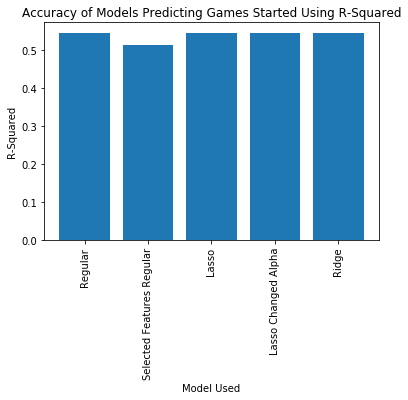

In [118]:
#create a visualization for r squared
model= ["Regular","Selected Features Regular","Lasso","Lasso Changed Alpha","Ridge"]
values= [0.5449,0.5126,0.5449,0.5449,0.5449]

plt.title('Accuracy of Models Predicting Games Started Using R-Squared')
plt.ylabel('R-Squared')
plt.xlabel('Model Used')
plt.bar(model,values)
plt.xticks(rotation=90)
plt.show()

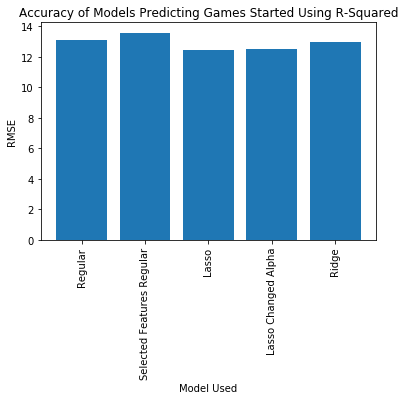

In [119]:
#create a visualization for Root Mean Squared Error
model= ["Regular","Selected Features Regular","Lasso","Lasso Changed Alpha","Ridge"]
values= [13.1231,13.5809,12.4508,12.5199,12.9787]

plt.title('Accuracy of Models Predicting Games Started Using R-Squared')
plt.ylabel('RMSE')
plt.xlabel('Model Used')
plt.bar(model,values)
plt.xticks(rotation=90)
plt.show()

### Describe what is being shown in your findings.
#### The RMSE is higher and the R squared of the regular regression with the reduced features. Even though those three features may be important, having more features might help to explain some efficiencies in how players play. The other regressions did not change significantly but there was more change in the RMSE than the R squared. The change in alpha did not have an impact on the lasso model.

### What challenges did you run into? Do you think it was because of the data, the model, the research question? How would you overcome these challenges?

#### Initially I had difficulties loading the data and the initial problem that I wanted to solve had already been solved. Loading the data was solved by looking all over the internet. I changed my problem as when I looked at how the other person had done it, I didn't know how else I might solve it. My biggest problem was that my kernel cut out and I had to redo a ton of the work. There really wasn't any way around it.


### Name 2 potential benefits of your model and 2 potential harms.

#### One potential benefit is that teams can potentially rest their players more efficiently and find players who are being underutilized. Players who aren't starting as much as predicted are given opportunites which positively impacts their livelihood.  In the same way, a negative is that people lose opportunities based on an algorithm. Basketball has a lot of factors that cannot be measured by a stat sheet. Players could become more selfish to improve their statistics instead of promote what is best for the team. It would be bad for players mental health as it is another metric that they are judged on that can be somewhat out of their control. Another positive could end up being a higher quality product becuase teams are able to field a more efficient team. However, the change of play to fulfill stat requirements could also take away from the beauty of the game.


### Name one research question you might ask next for future work. Why is it important?

#### How does the age of a player impact the number of minutes played by each position? Some players have different things that make them effective, and those factor into different positions. This could highlight when certain types of players are more likely to start regressing in their careers. It could also help teams with structuring contracts if they want the most value for their dollar.